### Breast Cancer Prediction
##### Bhushan Suryawanshi - Bellevue University


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
cancer_df = pd.read_csv('wisconsin_data.csv')

In [3]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
cancer_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

Lets drop the column that don't have data - ```Unnamed: 32```

In [5]:
cancer_df = cancer_df.drop(['Unnamed: 32'], axis=1)

Rename columns to ensure same naming pattern. 

In [6]:
cancer_df.columns = cancer_df.columns.str.replace(' ', '_')

In [7]:
print(f"Total observations in dataset: {len(cancer_df.id)}")
print(f"Total unique observations in dataset: {len(cancer_df.id.unique())}")

Total observations in dataset: 569
Total unique observations in dataset: 569


This shows we don't have any duplicate data. 

However, ID is not required column so we can drop it. 

In [8]:
cancer_df.drop('id', axis = 1, inplace = True)

In [9]:
cancer_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Plotting malignant and benign data histogram to comapre data proportion. 

In [10]:
print(f"Count:\n{cancer_df['diagnosis'].value_counts()}")

Count:
B    357
M    212
Name: diagnosis, dtype: int64


In [11]:
print(f"Proportion of Data:\n{round(cancer_df['diagnosis'].value_counts(normalize=True)*100, 2)}")

Proportion of Data:
B    62.74
M    37.26
Name: diagnosis, dtype: float64


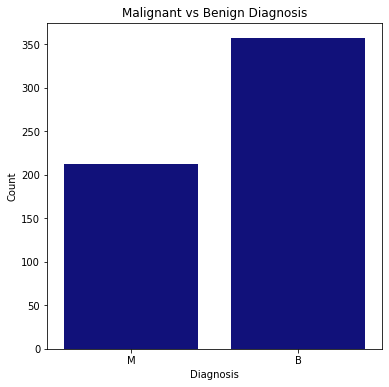

In [12]:
plt.rcParams['figure.figsize'] = [6,6]
sns.countplot(x = 'diagnosis', data = cancer_df, label = 'Count', color="DarkBlue")
plt.title('Malignant vs Benign Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

Let's look at the distribution of data for each features. 

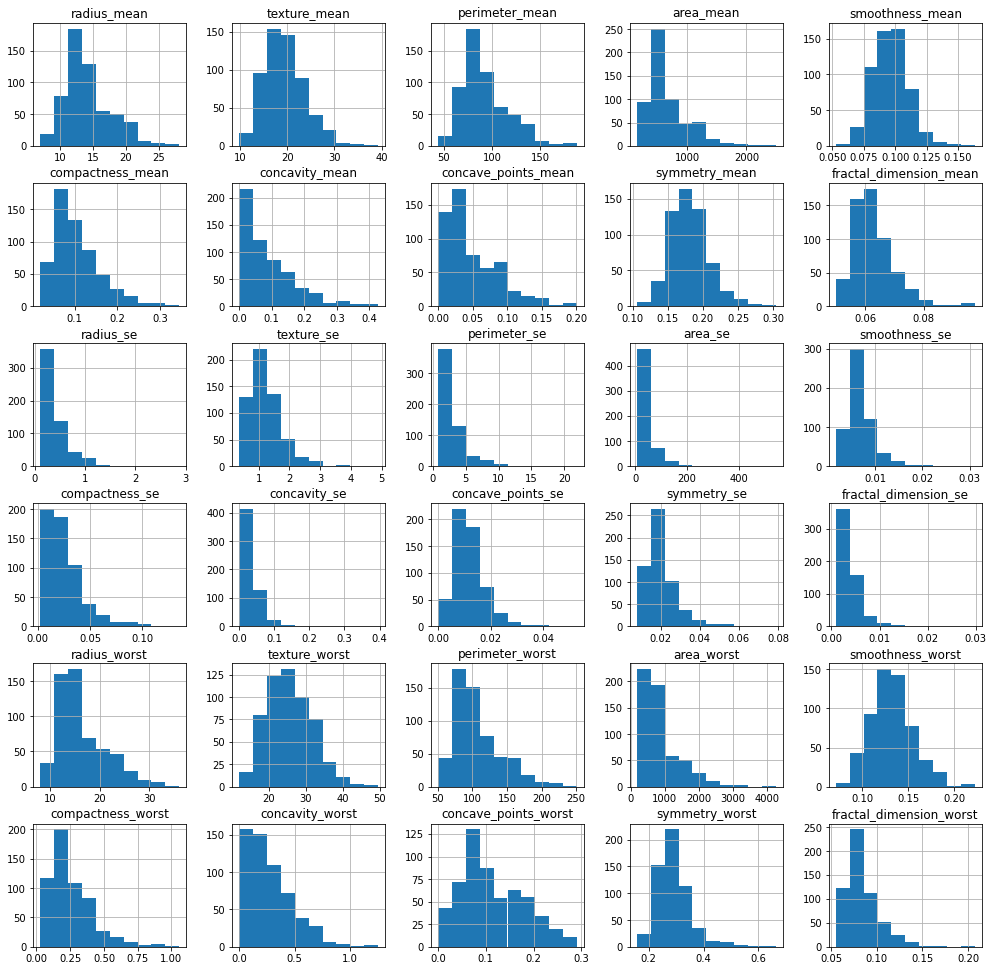

In [13]:
plt.rcParams['figure.figsize'] = [17,17]
cancer_df.hist()
plt.show()

Distribution of each feature shows the data is skewed and to avoid overfitting of the model we need to tranform them in normal distribution. I am using log transfomrmation for the same. 

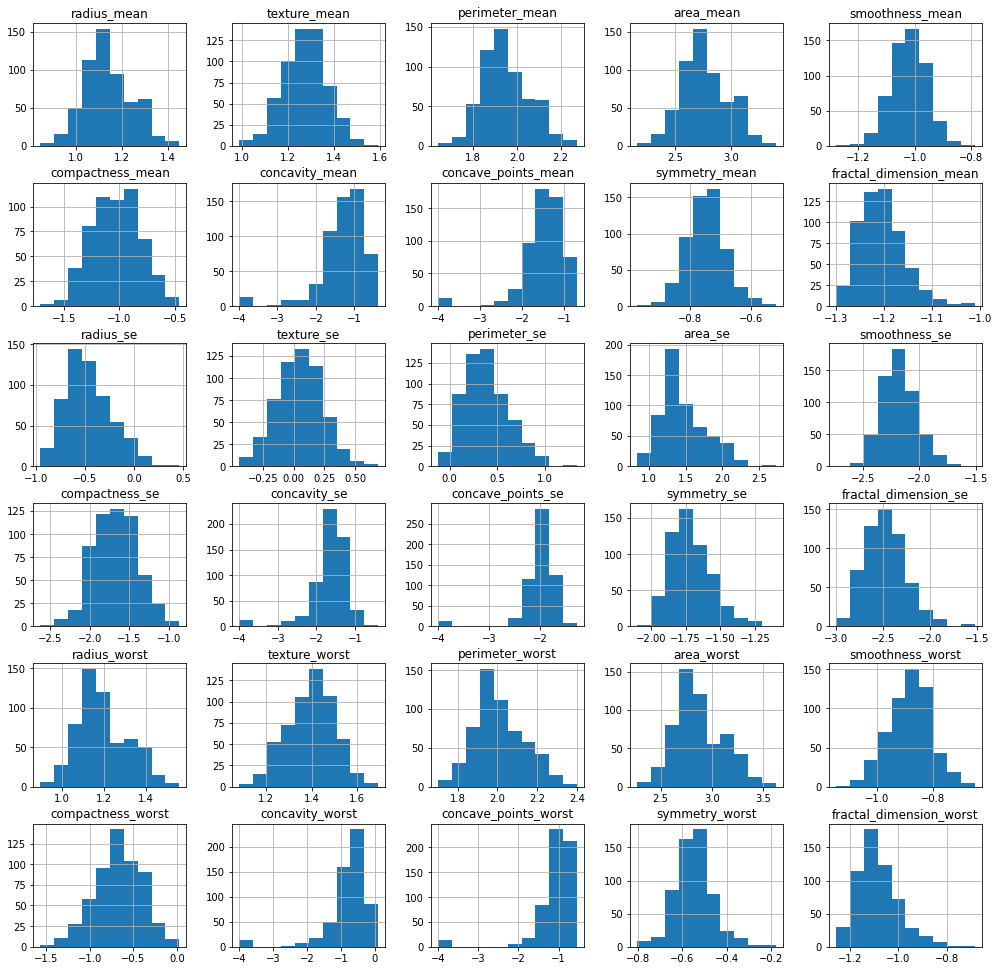

In [14]:
log_transformed_df = cancer_df.drop(['diagnosis'], axis = 1)
log_transformed_df = np.log10(log_transformed_df + .0001) 
log_transformed_df.hist()
plt.show()

In [15]:
log_transformed_df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.255034      1.016202        2.089199   3.000434        -0.926282   
1     1.313236      1.249690        2.123525   3.122544        -1.071399   
2     1.294248      1.327361        2.113944   3.080266        -0.959793   
3     1.057670      1.309206        1.889750   2.586700        -0.845880   
4     1.307284      1.156552        2.130656   3.112940        -0.998266   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0         -0.556424       -0.522589            -0.832092      -0.616185   
1         -1.103805       -1.060481            -1.153230      -0.741602   
2         -0.795880       -0.704433            -0.892790      -0.684030   
3         -0.546682       -0.617083            -0.977572      -0.585361   
4         -0.876475       -0.703116            -0.981300      -0.742321   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0               -1.103419  ...      1.404493       1.238801         2.266232   
1               -1.245881  ...      1.397768       1.369403         2.200851   
2               -1.221198  ...      1.372361       1.407053         2.183270   
3               -1.010817  ...      1.173481       1.423248         1.995065   
4               -1.229664  ...      1.352956       1.221938         2.182415   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    3.305136         -0.789681          -0.176721        -0.147520   
1    3.291369         -0.906929          -0.728856        -0.616723   
2    3.232742         -0.840132          -0.372020        -0.346305   
3    2.754119         -0.677988          -0.062282        -0.163043   
4    3.197281         -0.861697          -0.688034        -0.397831   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0             -0.575935       -0.337053                -0.924453  
1             -0.730254       -0.560509                -1.050025  
2             -0.614215       -0.442012                -1.057099  
3             -0.589054       -0.177897                -0.761703  
4             -0.788879       -0.626169                -1.114187  

[5 rows x 30 columns]

Taking summary statistics of each feature. 

In [16]:
mean =['radius_mean', 'texture_mean', 'perimeter_mean','area_mean','smoothness_mean', 'compactness_mean','concavity_mean',
       'concave_points_mean','symmetry_mean','fractal_dimension_mean']

standard_err =['radius_se', 'texture_se', 'perimeter_se','area_se', 'smoothness_se', 'compactness_se','concavity_se',
               'concave_points_se','symmetry_se','fractal_dimension_se']

worst = ['radius_worst', 'texture_worst', 'perimeter_worst','area_worst','smoothness_worst', 'compactness_worst',
         'concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave_points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave_points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave_points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave_points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave_points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

Separate Benign and melignant observations. 

In [17]:
df_by_diagnosis = cancer_df.drop('diagnosis', axis = 1).columns
cancer_df.groupby(['diagnosis'])[df_by_diagnosis].agg([np.mean, np.std, np.min, np.max])

radius_mean                          texture_mean                   \
                 mean       std    amin   amax         mean       std   amin   
diagnosis                                                                      
B           12.146524  1.780512   6.981  17.85    17.914762  3.995125   9.71   
M           17.462830  3.203971  10.950  28.11    21.604906  3.779470  10.38   

                 perimeter_mean             ... concave_points_worst         \
            amax           mean        std  ...                 amin   amax   
diagnosis                                   ...                               
B          33.81      78.075406  11.807438  ...              0.00000  0.175   
M          39.28     115.365377  21.854653  ...              0.02899  0.291   

          symmetry_worst                           fractal_dimension_worst  \
                    mean       std    amin    amax                    mean   
diagnosis                                                                    
B               0.270246  0.041745  0.1566  0.4228                0.079442   
M               0.323468  0.074685  0.1565  0.6638                0.091530   

                                      
                std     amin    amax  
diagnosis                             
B          0.013804  0.05521  0.1486  
M          0.021553  0.05504  0.2075  

[2 rows x 120 columns]

Let's visualize separated data on a bar graph for better comparison. 

In [18]:
cancer_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
means_df = cancer_df[mean]
normalized_mean_df = (means_df - means_df.mean()) / (means_df.std())
normalized_mean_df.insert(loc = 0, column = 'diagnosis', value = cancer_df['diagnosis'])
mean_data = pd.melt(normalized_mean_df, id_vars = 'diagnosis', var_name = 'features', value_name = 'value')

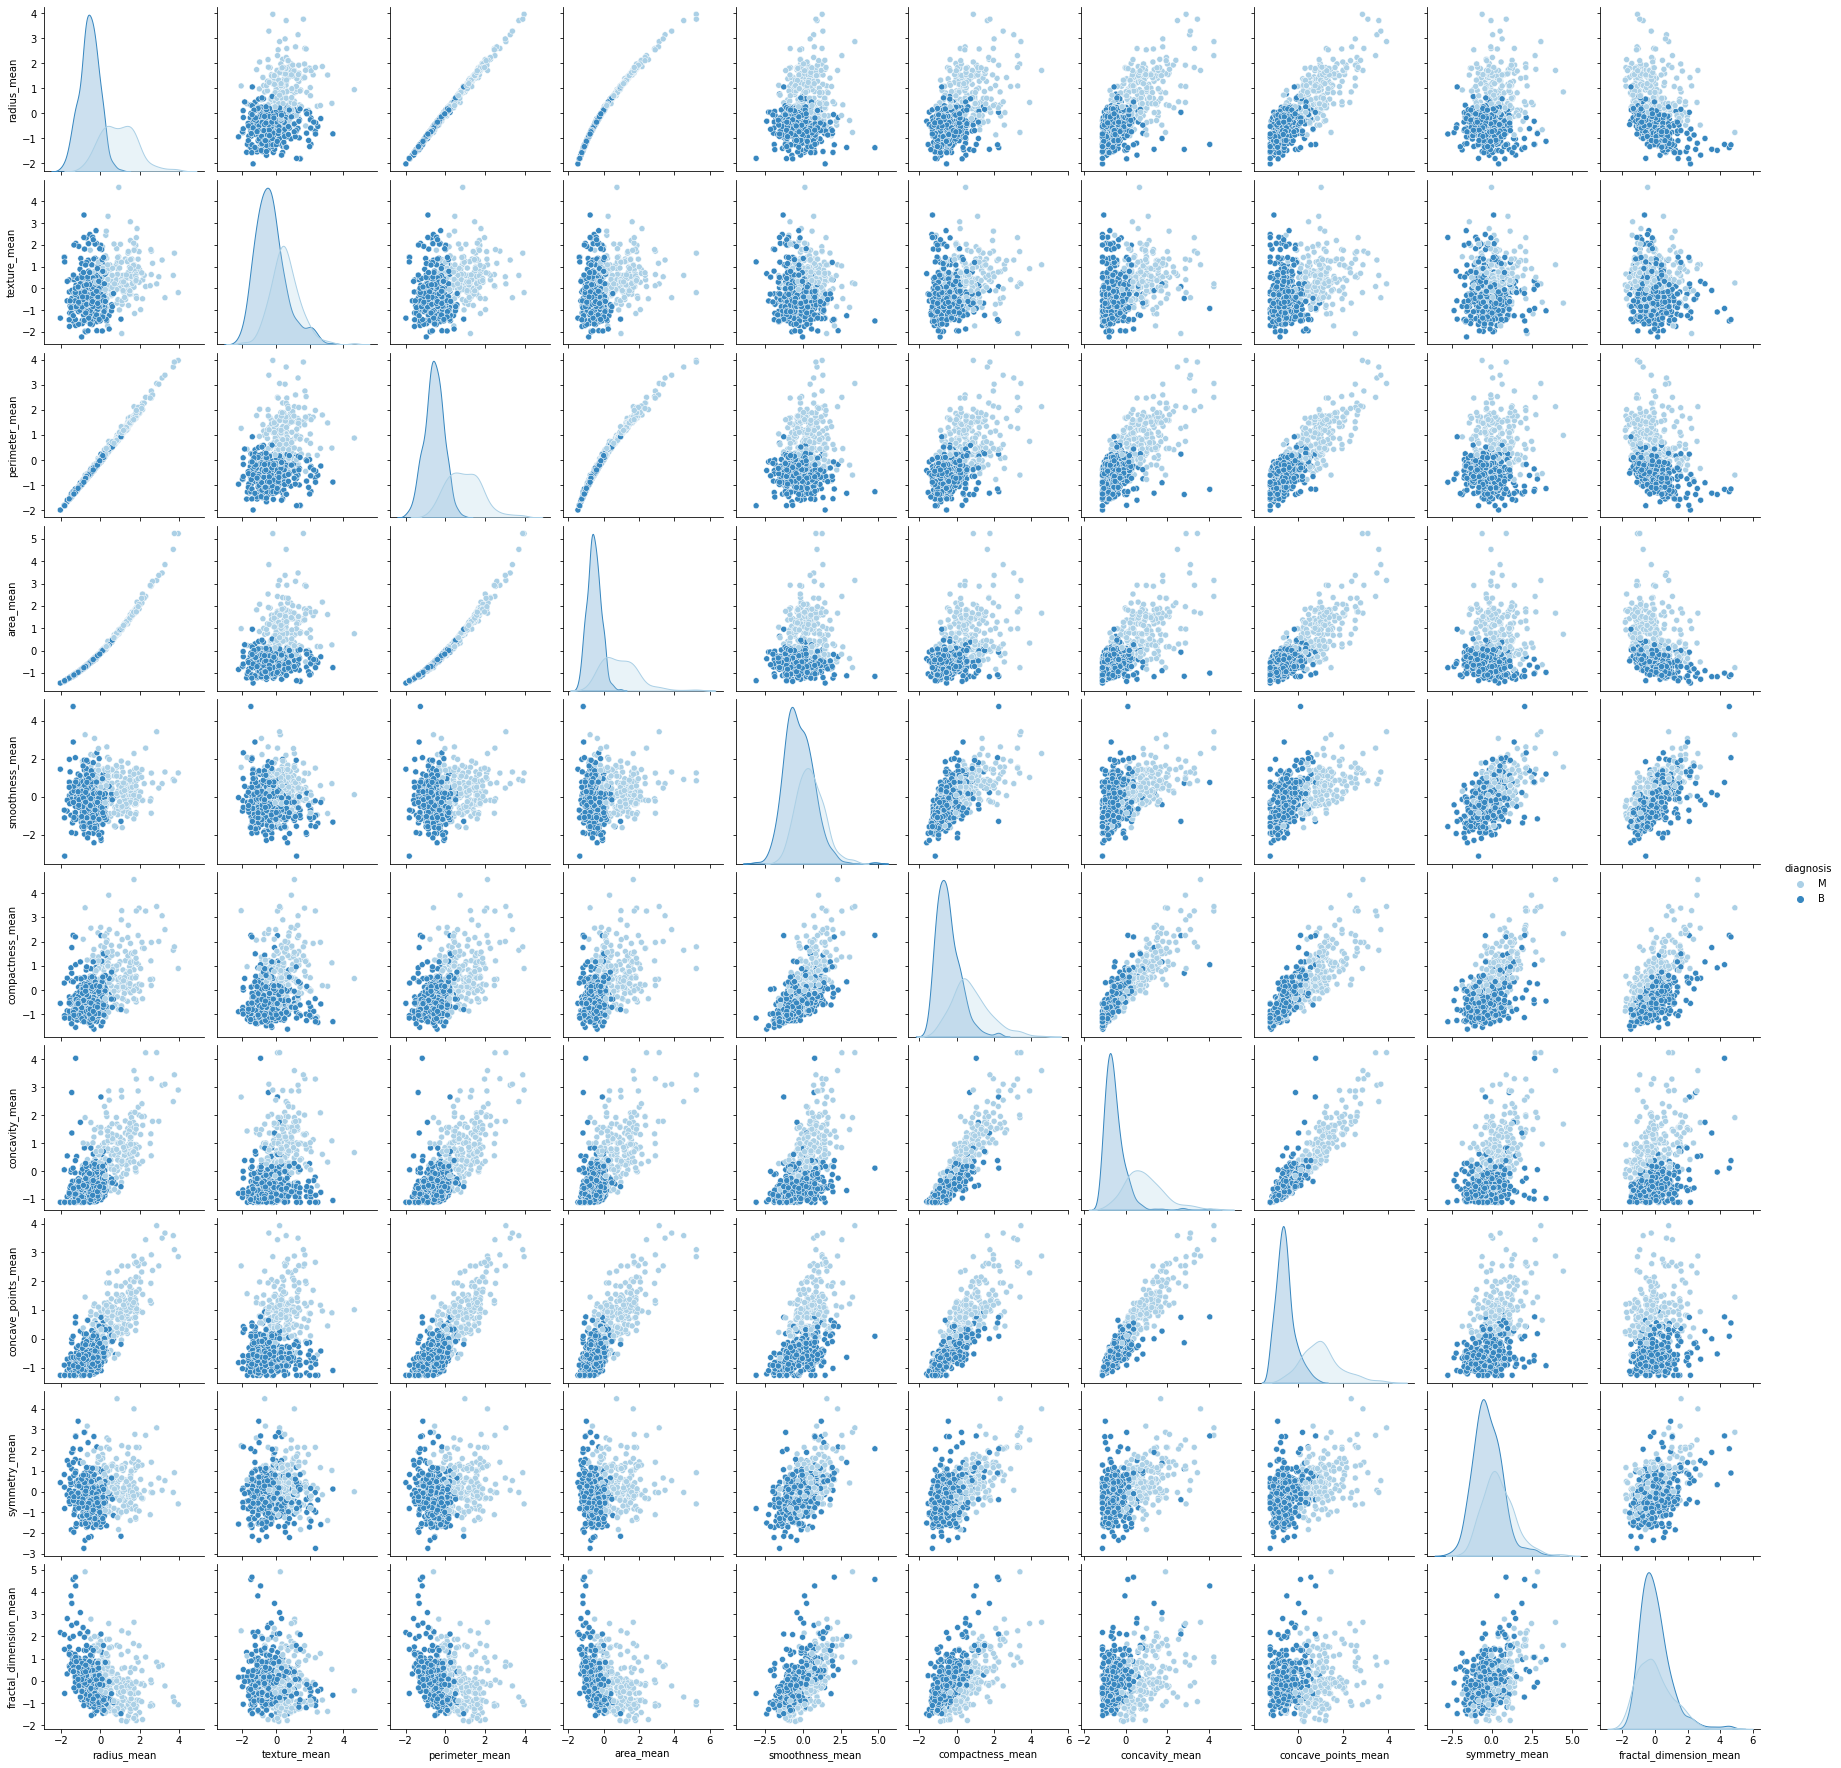

In [20]:
sns.pairplot(normalized_mean_df, hue = "diagnosis", palette="Blues")
plt.show()

#### Standard Error based on diagnosis

In [21]:
standard_error_df = cancer_df[standard_err]

normalized_std_error_df = (standard_error_df - standard_error_df.mean()) / (standard_error_df.std())
normalized_std_error_df.insert(loc = 0, column = 'diagnosis', value = cancer_df['diagnosis'])
standard_err_data = pd.melt(normalized_std_error_df, id_vars = 'diagnosis', var_name = 'features', value_name = 'value')

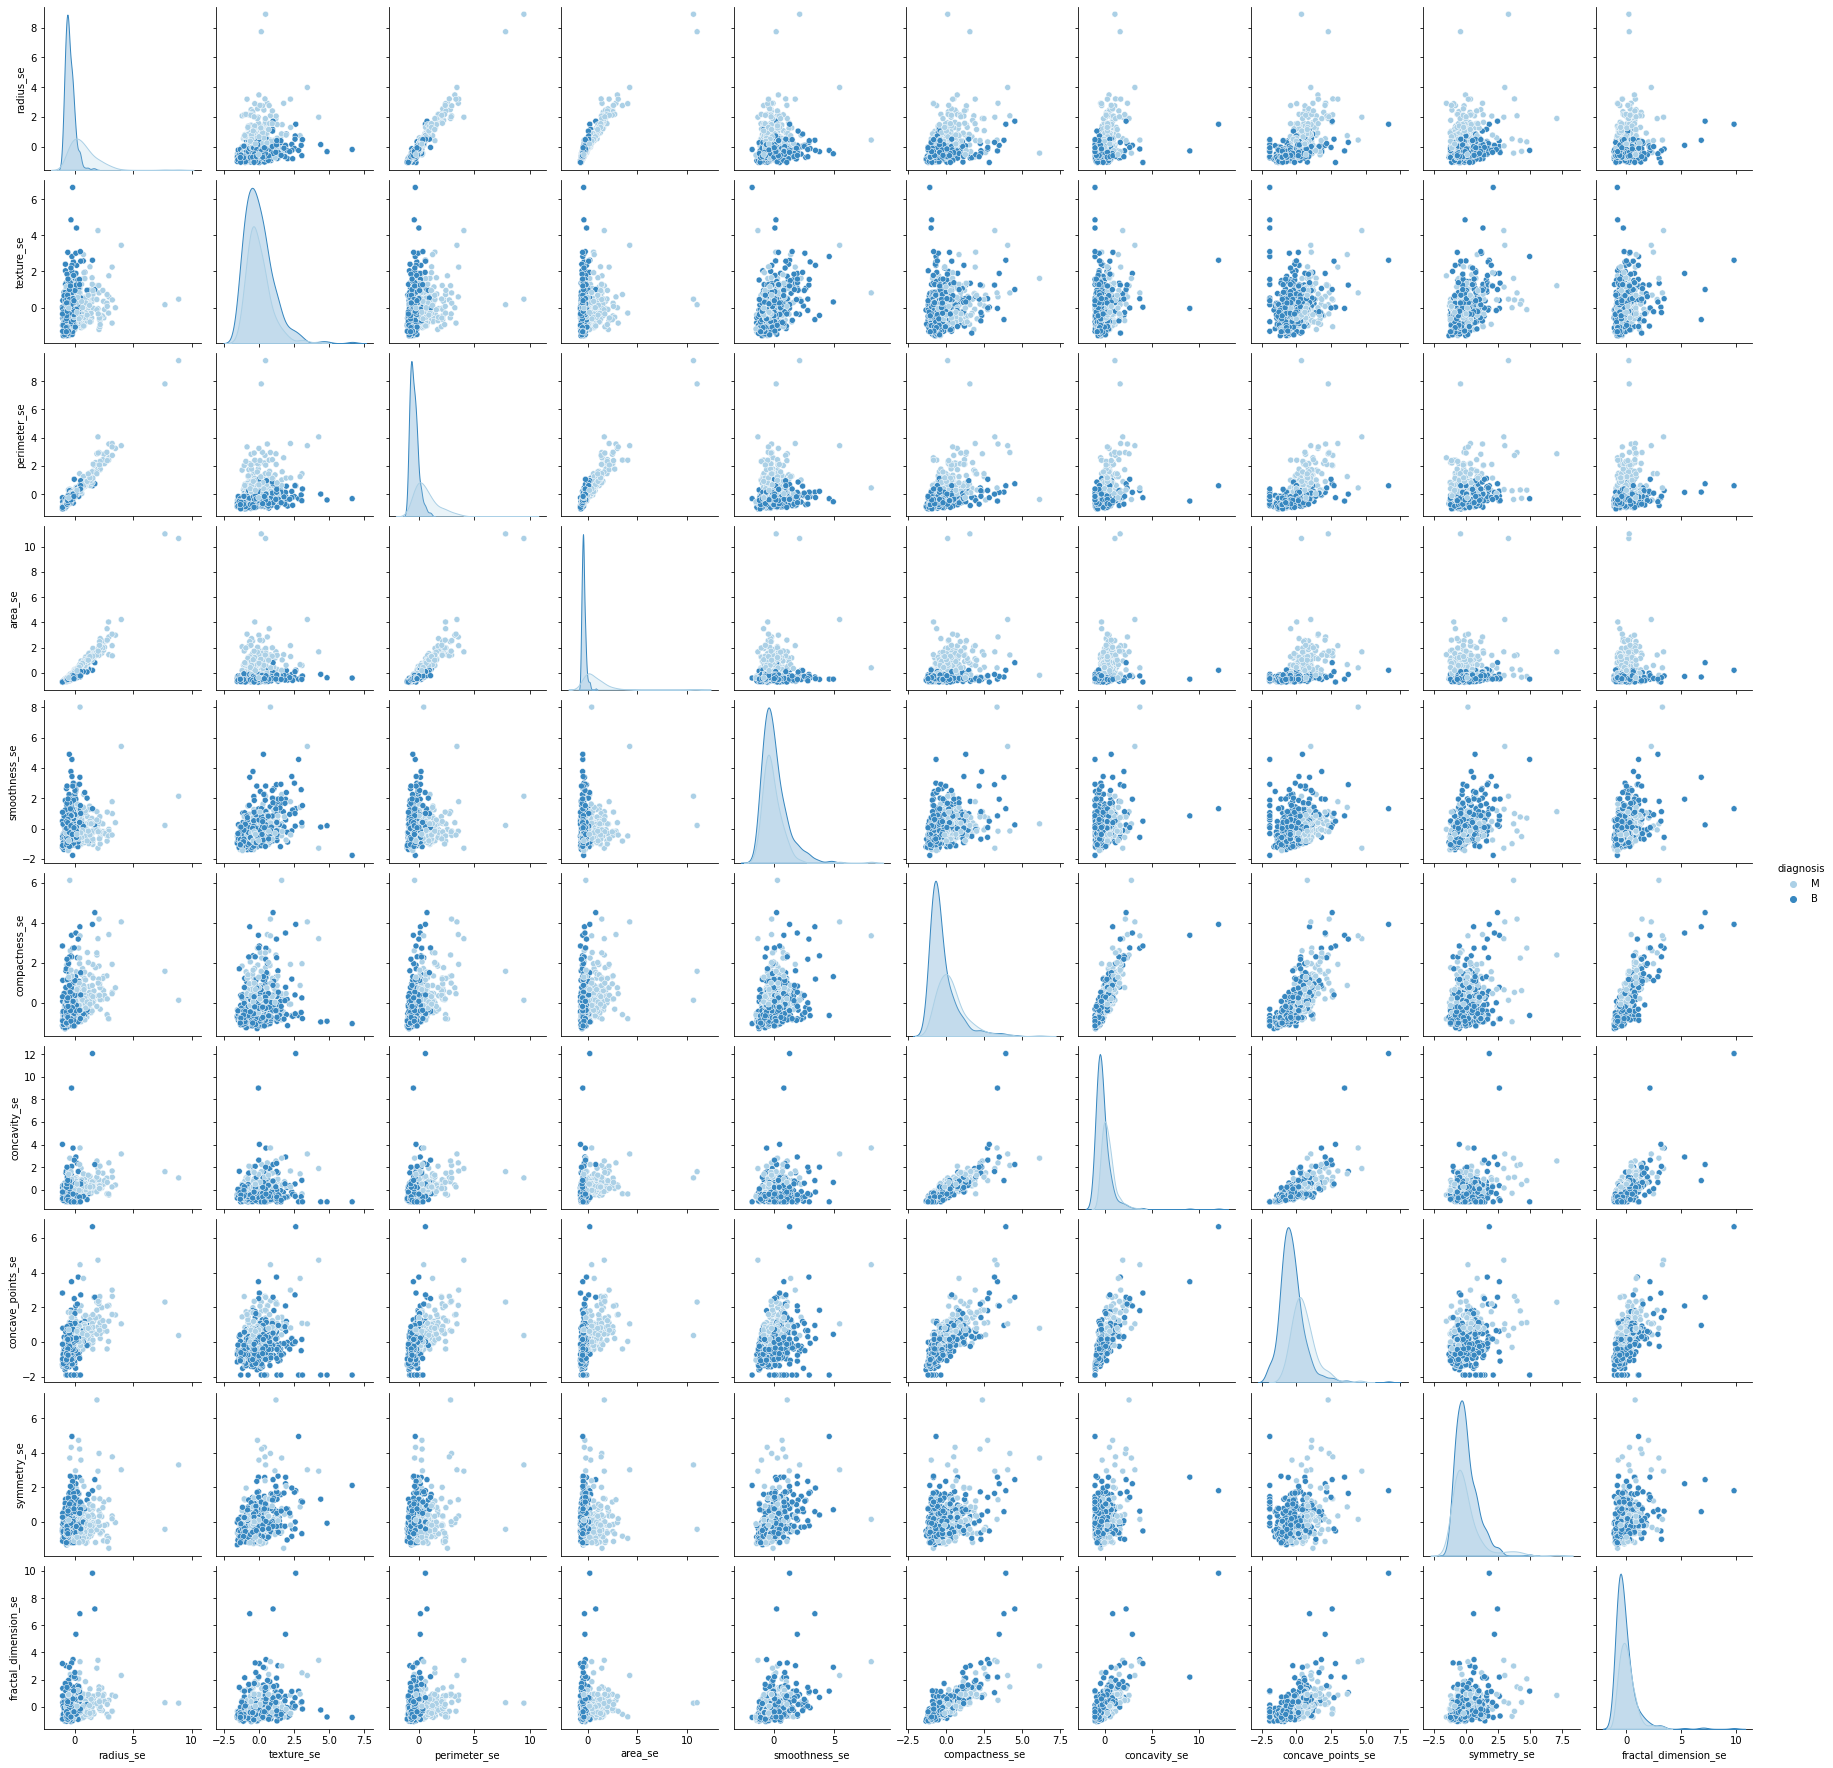

In [22]:
sns.pairplot(normalized_std_error_df, hue = "diagnosis", palette="Blues")
plt.show()

#### Largest mean (worst) plotted by diagnosis

In [23]:
worst_df = cancer_df[worst]

normalized_worst_df = (worst_df - worst_df.mean()) / (worst_df.std())
normalized_worst_df.insert(loc = 0, column = 'diagnosis', value = cancer_df['diagnosis'])
worst_data = pd.melt(normalized_worst_df, id_vars = 'diagnosis', var_name = 'features', value_name = 'value')

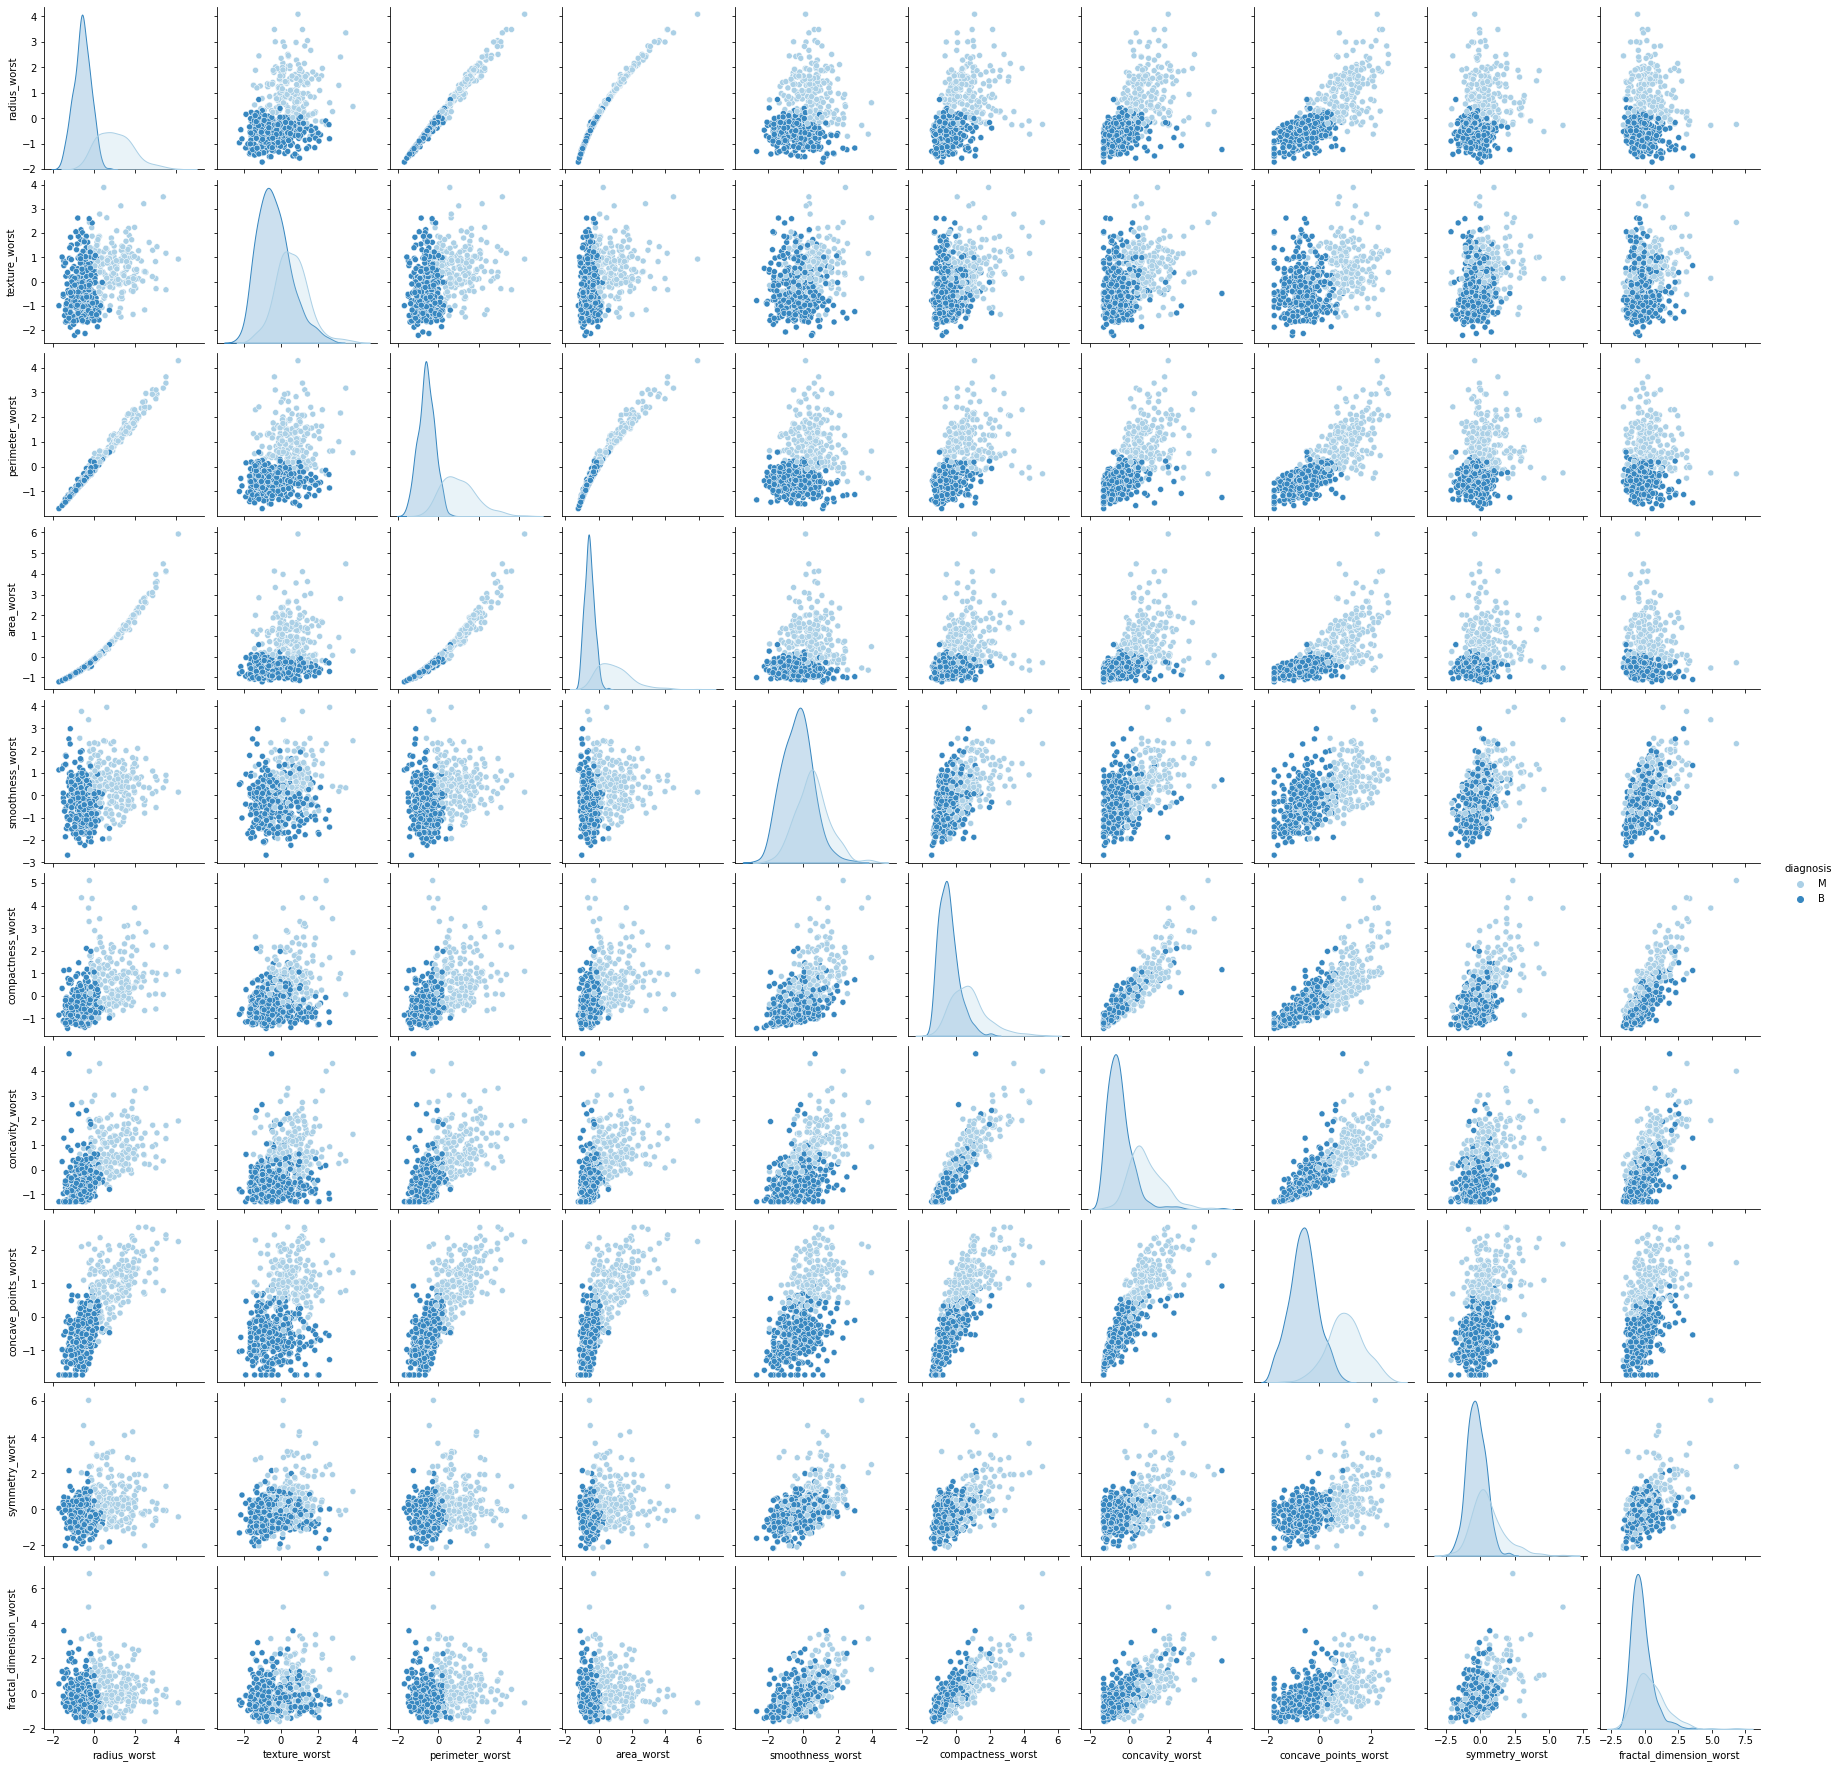

In [24]:
sns.pairplot(normalized_worst_df, hue = "diagnosis", palette="Blues")
plt.show()

For model building lets convert categorical data to numeric. Converting diagnosis column as - Malignant = 1 and Benign = 0

In [25]:
clean = {"diagnosis": {'M':1, 'B':0}}
df_num = cancer_df.copy()
df_num.replace(clean, inplace=True)

Lets insert converted data back to normalized dataframe

In [26]:
log_transformed_df.insert(loc = 0, column = 'diagnosis', value = df_num.diagnosis, allow_duplicates=False)
log_transformed_df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     1.255034      1.016202        2.089199   3.000434   
1          1     1.313236      1.249690        2.123525   3.122544   
2          1     1.294248      1.327361        2.113944   3.080266   
3          1     1.057670      1.309206        1.889750   2.586700   
4          1     1.307284      1.156552        2.130656   3.112940   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0        -0.926282         -0.556424       -0.522589            -0.832092   
1        -1.071399         -1.103805       -1.060481            -1.153230   
2        -0.959793         -0.795880       -0.704433            -0.892790   
3        -0.845880         -0.546682       -0.617083            -0.977572   
4        -0.998266         -0.876475       -0.703116            -0.981300   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0      -0.616185  ...      1.404493       1.238801         2.266232   
1      -0.741602  ...      1.397768       1.369403         2.200851   
2      -0.684030  ...      1.372361       1.407053         2.183270   
3      -0.585361  ...      1.173481       1.423248         1.995065   
4      -0.742321  ...      1.352956       1.221938         2.182415   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    3.305136         -0.789681          -0.176721        -0.147520   
1    3.291369         -0.906929          -0.728856        -0.616723   
2    3.232742         -0.840132          -0.372020        -0.346305   
3    2.754119         -0.677988          -0.062282        -0.163043   
4    3.197281         -0.861697          -0.688034        -0.397831   

   concave_points_worst  symmetry_worst  fractal_dimension_worst  
0             -0.575935       -0.337053                -0.924453  
1             -0.730254       -0.560509                -1.050025  
2             -0.614215       -0.442012                -1.057099  
3             -0.589054       -0.177897                -0.761703  
4             -0.788879       -0.626169                -1.114187  

[5 rows x 31 columns]

Plot coorelation heatmap for both log transformed and original df after diagnosis column conversion. 

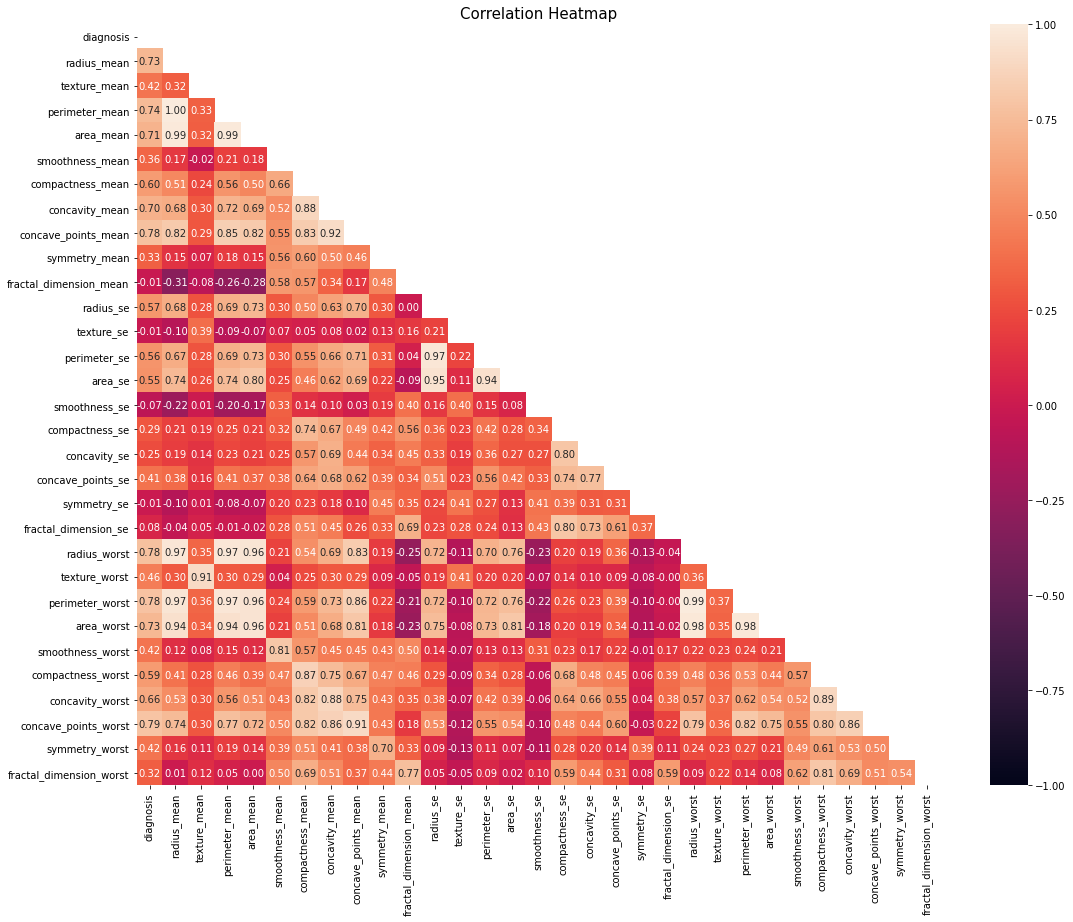

In [27]:
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.figure(figsize = (18,14))
sns.heatmap(df_num.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, fmt = '.2f')
plt.title('Correlation Heatmap', fontdict={'fontsize':15})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

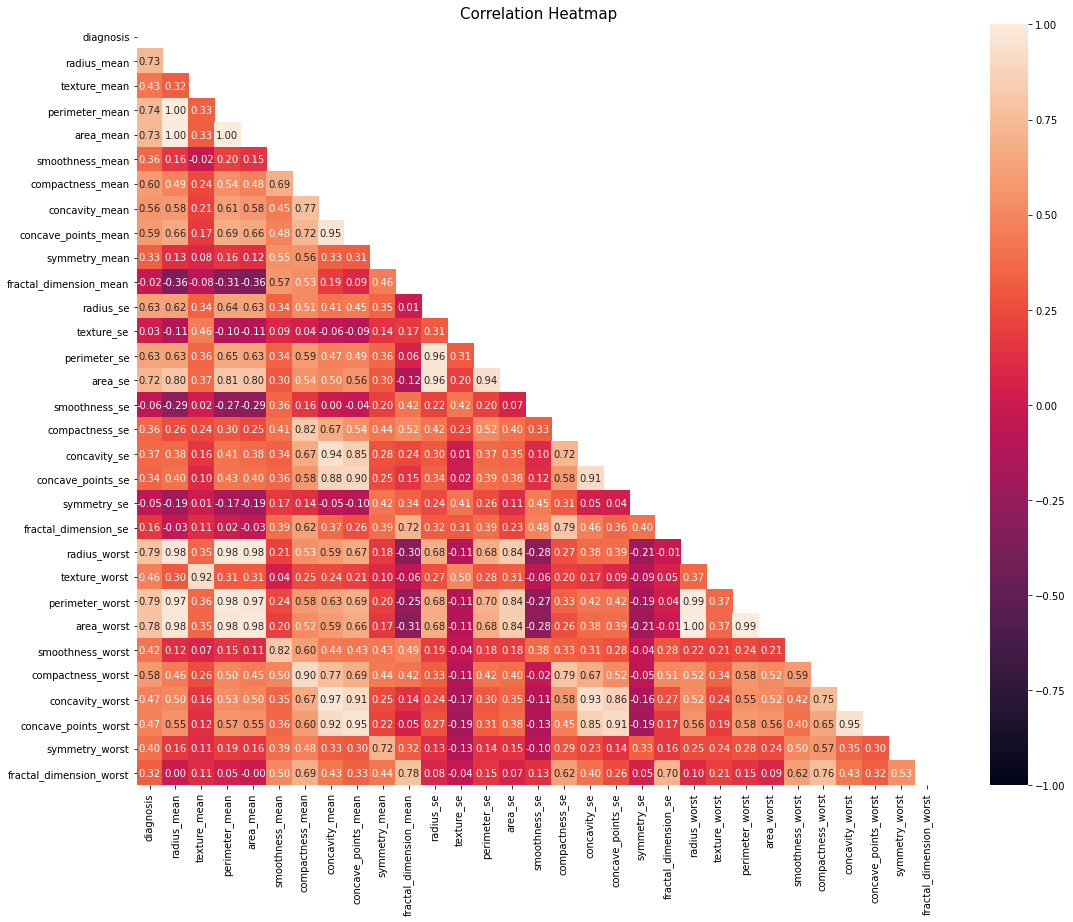

In [28]:
corr = log_transformed_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.figure(figsize = (18,14))
sns.heatmap(log_transformed_df.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, fmt = '.2f')
plt.title('Correlation Heatmap', fontdict={'fontsize':15})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [29]:
X = log_transformed_df.drop(['diagnosis'], axis = 1)
y = log_transformed_df['diagnosis']

Feature selectionusing LassoCV

In [30]:
reg = LassoCV(cv = 10, random_state = 40, max_iter = 1200).fit(X, y)
print(f'LassoCV Best Alpha:{round(reg.alpha_, 4)}')
print(f'LassoCV Best Score: {round(reg.score(X,y),4)}')

LassoCV Best Alpha:0.0002
LassoCV Best Score: 0.7699


Lasso regression will eliminate features by shrinking its coefficient zero. 

In [31]:
coef = pd.Series(reg.coef_, index = X.columns)
print(f'Features before elimination:{len(coef)}')
print(f'Features eliminated:{sum(coef == 0)}')
print(f'Features remaining:{sum(coef != 0)}')

Features before elimination:30
Features eliminated:7
Features remaining:23


In [32]:
coef

radius_mean                0.000000
texture_mean               0.000000
perimeter_mean             0.000000
area_mean                  0.111823
smoothness_mean           -0.000000
compactness_mean          -0.594359
concavity_mean             0.721479
concave_points_mean        0.187092
symmetry_mean             -0.112444
fractal_dimension_mean    -0.364445
radius_se                 -0.591889
texture_se                -0.218899
perimeter_se               0.061665
area_se                    0.863583
smoothness_se              0.092736
compactness_se            -0.181693
concavity_se              -0.000000
concave_points_se          0.243394
symmetry_se               -0.069631
fractal_dimension_se      -0.249581
radius_worst               0.000000
texture_worst              0.904435
perimeter_worst            0.000000
area_worst                 0.444336
smoothness_worst           0.591530
compactness_worst          0.339246
concavity_worst           -0.576156
concave_points_worst      -0

Dropping  features with zero coefficient. 

In [33]:
drop_list = ['radius_mean', 'smoothness_mean', 'concavity_se','texture_mean', 'radius_worst','perimeter_worst',
             'perimeter_mean']

feature_df = X.drop(drop_list, axis = 1 )

Lets see the coorelation of selected feature. 

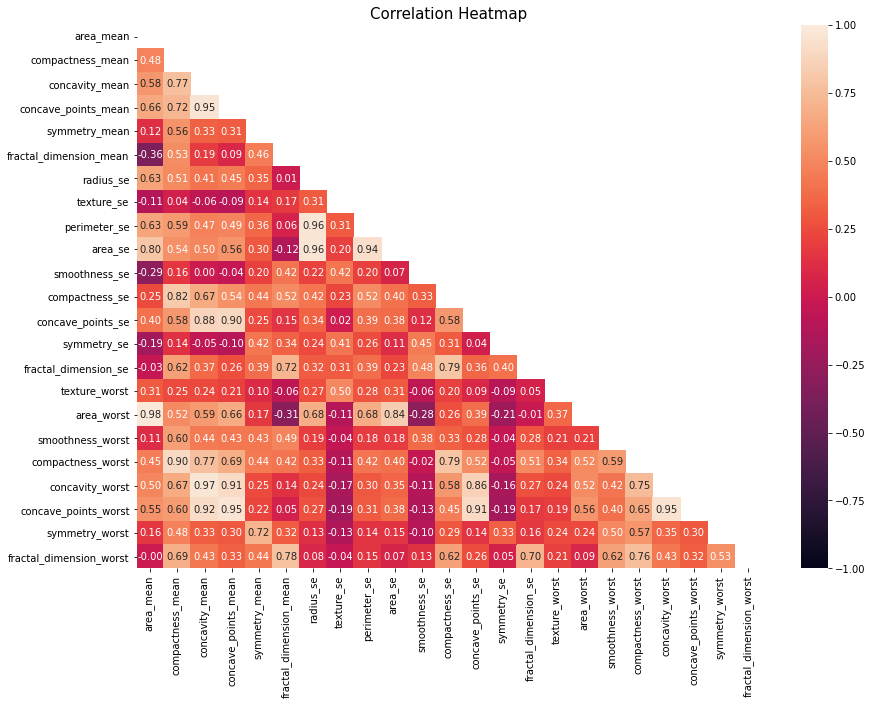

In [34]:
corr = feature_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (14,10))
sns.heatmap(feature_df.corr(), mask = mask, vmin = -1, vmax =1, annot = True, fmt = '.2f')
plt.title('Correlation Heatmap', fontdict={'fontsize':15})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [35]:
feature_df.insert(loc = 0, column = 'diagnosis', value = df_num.diagnosis, allow_duplicates = False)

In [36]:
x = feature_df[feature_df.columns[feature_df.columns != 'diagnosis']]
y = feature_df.diagnosis
 
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     80.50
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          1.44e-158
Time:                        12:11:40   Log-Likelihood:                 27.453
No. Observations:                 569   AIC:                            -6.907
Df Residuals:                     545   BIC:                             97.35
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [37]:
# features are dropped and reevaluated to get p-values to <=0.05
x.drop('area_worst',axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     84.28
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          1.66e-159
Time:                        12:11:40   Log-Likelihood:                 27.376
No. Observations:                 569   AIC:                            -8.753
Df Residuals:                     546   BIC:                             91.16
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [38]:
x.drop('smoothness_se',axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     88.39
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          2.03e-160
Time:                        12:11:41   Log-Likelihood:                 27.220
No. Observations:                 569   AIC:                            -10.44
Df Residuals:                     547   BIC:                             85.13
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [39]:
x.drop('compactness_worst',axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     92.90
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          2.48e-161
Time:                        12:11:41   Log-Likelihood:                 27.032
No. Observations:                 569   AIC:                            -12.06
Df Residuals:                     548   BIC:                             79.16
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [40]:
x.drop('compactness_se',axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     97.95
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          2.55e-162
Time:                        12:11:41   Log-Likelihood:                 26.997
No. Observations:                 569   AIC:                            -13.99
Df Residuals:                     549   BIC:                             72.88
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [41]:
x.drop('concave_points_mean',axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     103.4
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          3.80e-163
Time:                        12:11:41   Log-Likelihood:                 26.547
No. Observations:                 569   AIC:                            -15.09
Df Residuals:                     550   BIC:                             67.44
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [42]:
x.drop('perimeter_se',axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          5.92e-164
Time:                        12:11:41   Log-Likelihood:                 26.023
No. Observations:                 569   AIC:                            -16.05
Df Residuals:                     551   BIC:                             62.14
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [43]:
x.drop('symmetry_se',axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          1.24e-164
Time:                        12:11:41   Log-Likelihood:                 25.155
No. Observations:                 569   AIC:                            -16.31
Df Residuals:                     552   BIC:                             57.54
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [44]:
x.drop('symmetry_mean',axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     123.6
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          2.06e-165
Time:                        12:11:41   Log-Likelihood:                 24.501
No. Observations:                 569   AIC:                            -17.00
Df Residuals:                     553   BIC:                             52.50
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [45]:
x.drop('area_mean',axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     132.1
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          4.41e-166
Time:                        12:11:41   Log-Likelihood:                 23.550
No. Observations:                 569   AIC:                            -17.10
Df Residuals:                     554   BIC:                             48.06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [46]:
x.drop('concave_points_worst',axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     141.7
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          1.11e-166
Time:                        12:11:41   Log-Likelihood:                 22.399
No. Observations:                 569   AIC:                            -16.80
Df Residuals:                     555   BIC:                             44.02
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [47]:
x.drop('concave_points_se',axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     153.6
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          1.12e-167
Time:                        12:11:41   Log-Likelihood:                 22.141
No. Observations:                 569   AIC:                            -18.28
Df Residuals:                     556   BIC:                             38.19
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [48]:
x.drop('texture_se',axis=1, inplace=True)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     165.5
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          1.77e-167
Time:                        12:11:41   Log-Likelihood:                 19.016
No. Observations:                 569   AIC:                            -14.03
Df Residuals:                     557   BIC:                             38.09
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Final feature set

In [49]:
x.drop('const',axis = 1, inplace = True)
x.insert(loc = 0, column = 'diagnosis', value = y)
final_df = x

In [50]:
final_df.head()

diagnosis  compactness_mean  concavity_mean  fractal_dimension_mean  \
0          1         -0.556424       -0.522589               -1.103419   
1          1         -1.103805       -1.060481               -1.245881   
2          1         -0.795880       -0.704433               -1.221198   
3          1         -0.546682       -0.617083               -1.010817   
4          1         -0.876475       -0.703116               -1.229664   

   radius_se   area_se  fractal_dimension_se  texture_worst  smoothness_worst  \
0   0.039454  2.185826             -2.201142       1.238801         -0.789681   
1  -0.264721  1.869702             -2.439854       1.369403         -0.906929   
2  -0.127436  1.973267             -2.330590       1.407053         -0.840132   
3  -0.304781  1.435049             -2.031144       1.423248         -0.677988   
4  -0.120732  1.975156             -2.282746       1.221938         -0.861697   

   concavity_worst  symmetry_worst  fractal_dimension_worst  
0        -0.147520       -0.337053                -0.924453  
1        -0.616723       -0.560509                -1.050025  
2        -0.346305       -0.442012                -1.057099  
3        -0.163043       -0.177897                -0.761703  
4        -0.397831       -0.626169                -1.114187

Finalized dataframe is saved in csv format to use it for models in R.

In [51]:
csv_data = final_df.to_csv('r_dataset.csv', index = False) 

In [52]:
target = final_df['diagnosis']
features = final_df[final_df.columns[final_df.columns != 'diagnosis']]

Train test Split

In [53]:
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size = 0.2, random_state = 40)

Verify the data set dimentions. 

In [54]:
print('Training set sample size:', X_train.shape[0])
print('Testing set sample size:', X_val.shape[0])

Training set sample size: 455
Testing set sample size: 114


In [55]:
print('Benign and Malignant training set count:')
print(y_train.value_counts())

Benign and Malignant training set count:
0    282
1    173
Name: diagnosis, dtype: int64


In [56]:
print('Benign and Malignant validation set count:')
print(y_val.value_counts())

Benign and Malignant validation set count:
0    75
1    39
Name: diagnosis, dtype: int64


In [57]:
def model_metrics(m):
    print('Train mean accuracy:', round(cross_val_score(m, X_train, y_train, cv = 10, scoring = 'accuracy').mean(), 4))
    print('Test mean accuracy:', round(cross_val_score(m, X_val, y_val, cv = 10, scoring = 'accuracy').mean(), 4))
    print('AUC score:', round(roc_auc_score(y_val,m.predict(X_val)), 4))
    print('')
    print(classification_report(y_val,m.predict(X_val)))
    cm = confusion_matrix(y_val, m.predict(X_val))
    heatmap = sns.heatmap(cm, annot = True, fmt = "d", annot_kws={"size": 20},
                cbar = False,  
                xticklabels = ['Benign', 'Malignant'], yticklabels = [ 'Benign', 'Malignant'])
    heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 15)
    heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 15)
    plt.show()

Train mean accuracy: 0.9273
Test mean accuracy: 0.9303
AUC score: 0.9672

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.93      0.97      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



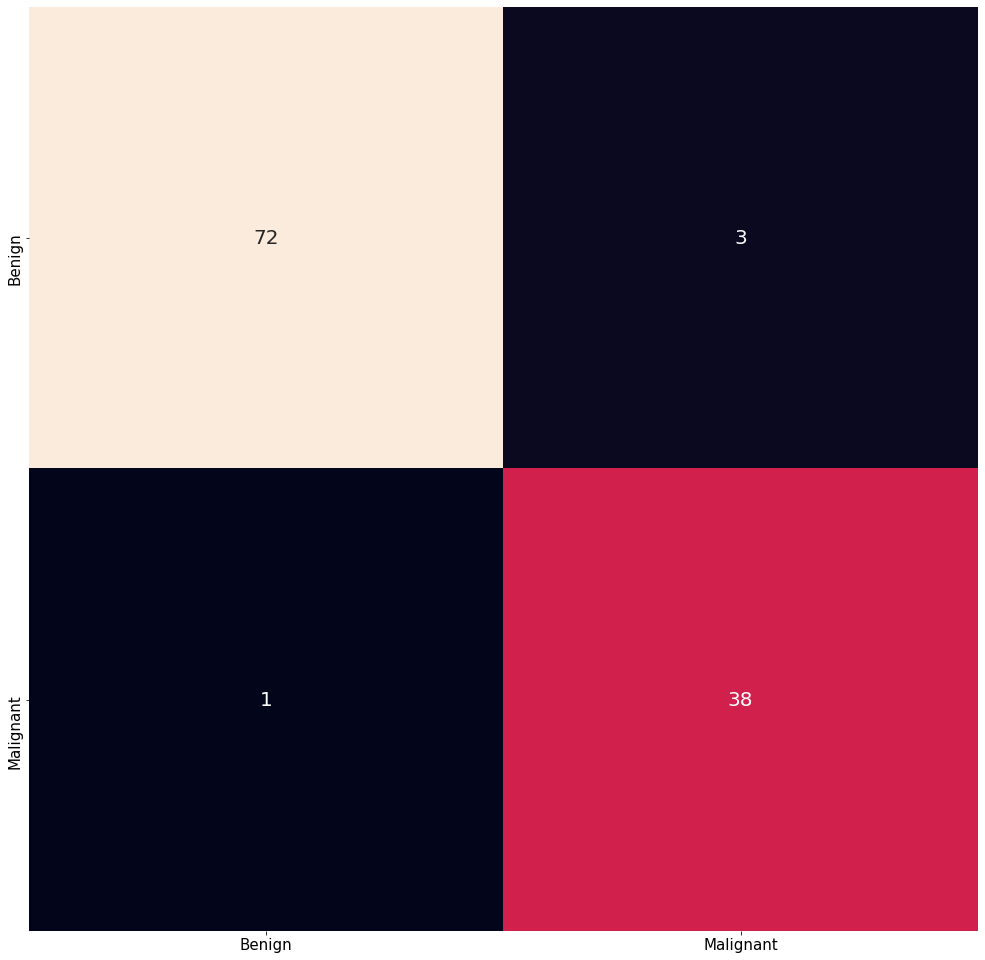

In [58]:
# Random Forest
clf_rf = RandomForestClassifier(n_estimators = 100, random_state = 40, max_depth = None,
                                min_samples_split = 2)  
clr_rf = clf_rf.fit(X_train, y_train)
model_metrics(clr_rf)

Train mean accuracy: 0.9714
Test mean accuracy: 0.9561
AUC score: 0.9415

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        75
           1       0.92      0.92      0.92        39

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



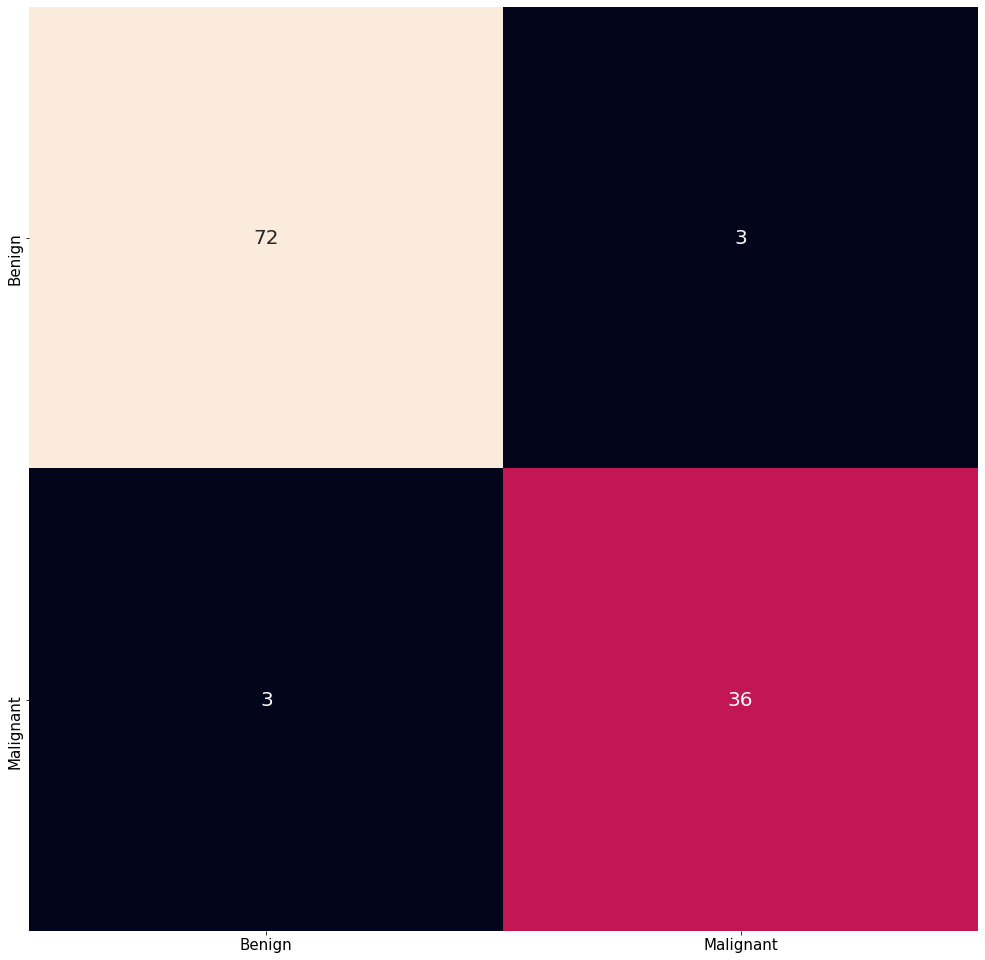

In [59]:
# Logistic RegressionCV
clf_log_reg = LogisticRegressionCV(cv = 10, random_state = 40, solver = 'liblinear')
clf_log_reg = clf_log_reg.fit(X_train, y_train)
model_metrics(clf_log_reg)

Best k value is 3


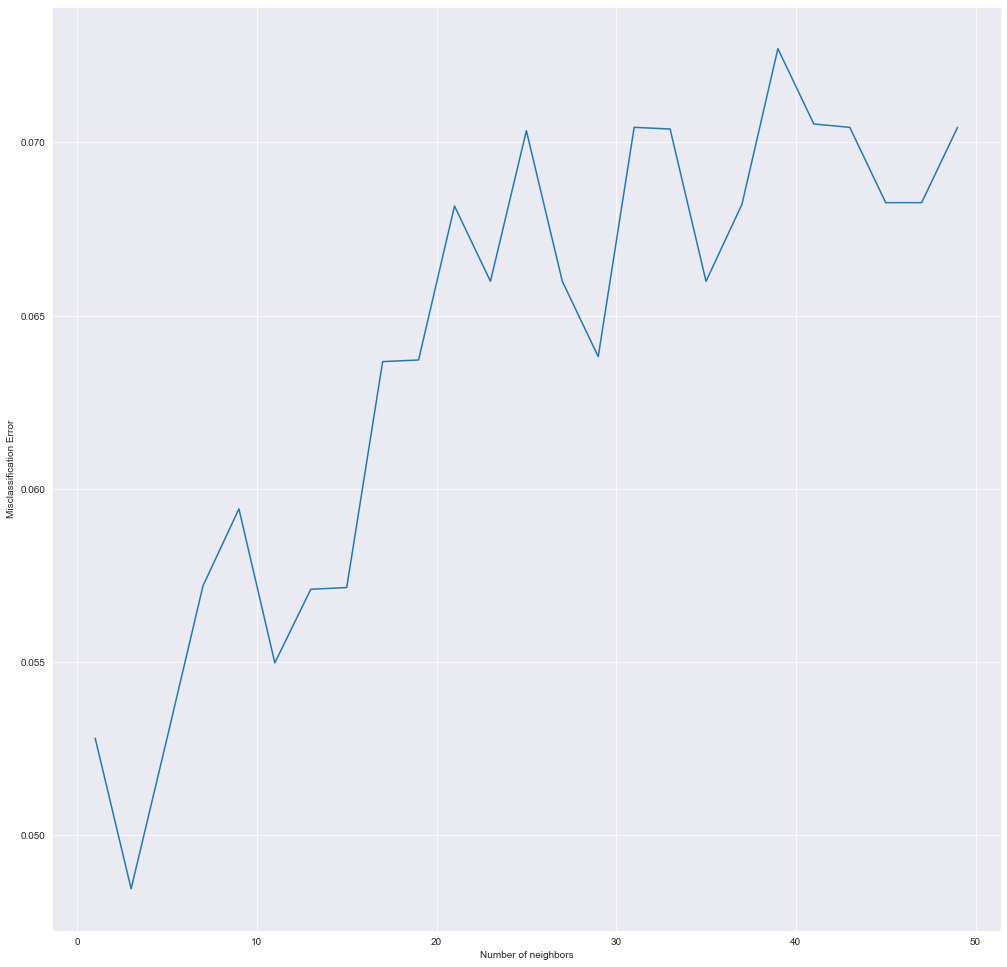

In [60]:
# Perform 10 fold cross validation
neighbors = []
cv_scores = []

for k in range(1, 50, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

# Misclassification error versus k
MSE = [1-x for x in cv_scores]

# Determinethe best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('Best k value is', optimal_k)

# Plot misclassification error versus k
sns.set_style('darkgrid')
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

Train mean accuracy: 0.9472
Test mean accuracy: 0.9561
AUC score: 0.9605

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.90      0.97      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



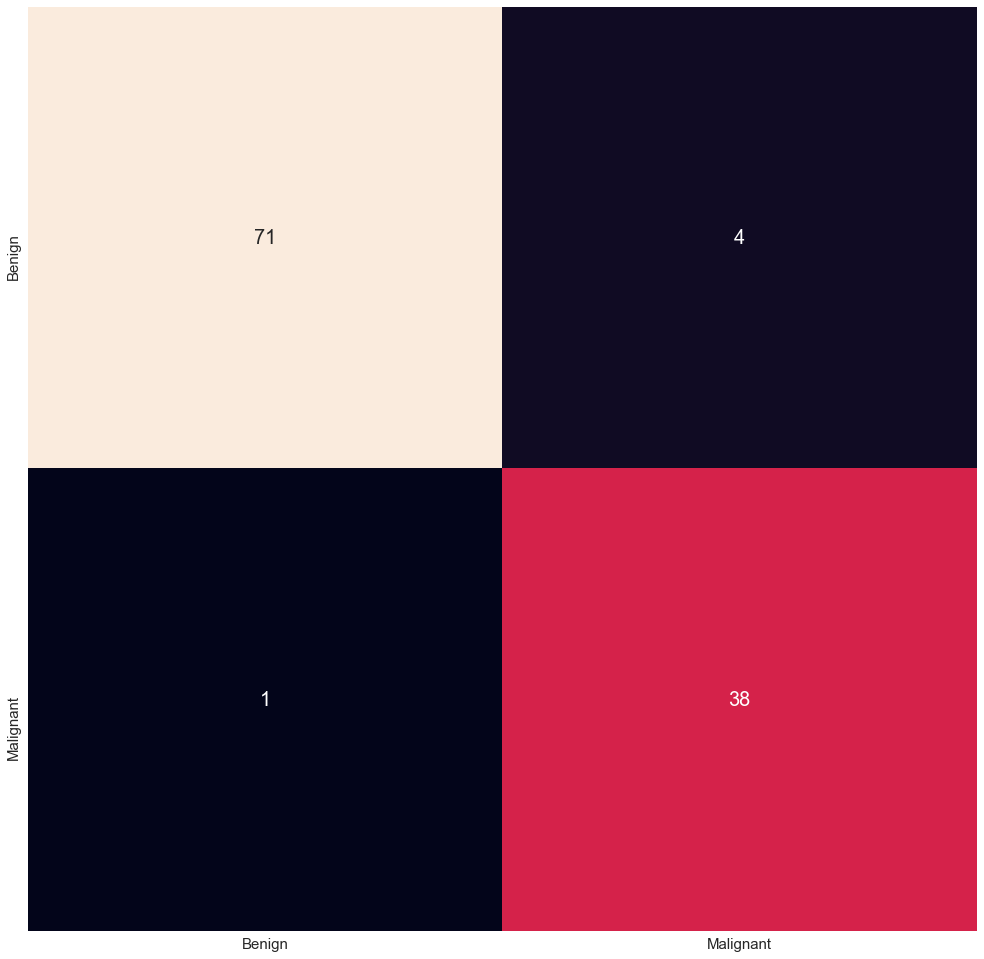

In [61]:
# Quick look at K = 1 
knn = KNeighborsClassifier(n_neighbors = 1)
knn = knn.fit(X_train, y_train)
model_metrics(knn)

Train mean accuracy: 0.9515
Test mean accuracy: 0.9644
AUC score: 0.9538

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.88      0.97      0.93        39

    accuracy                           0.95       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



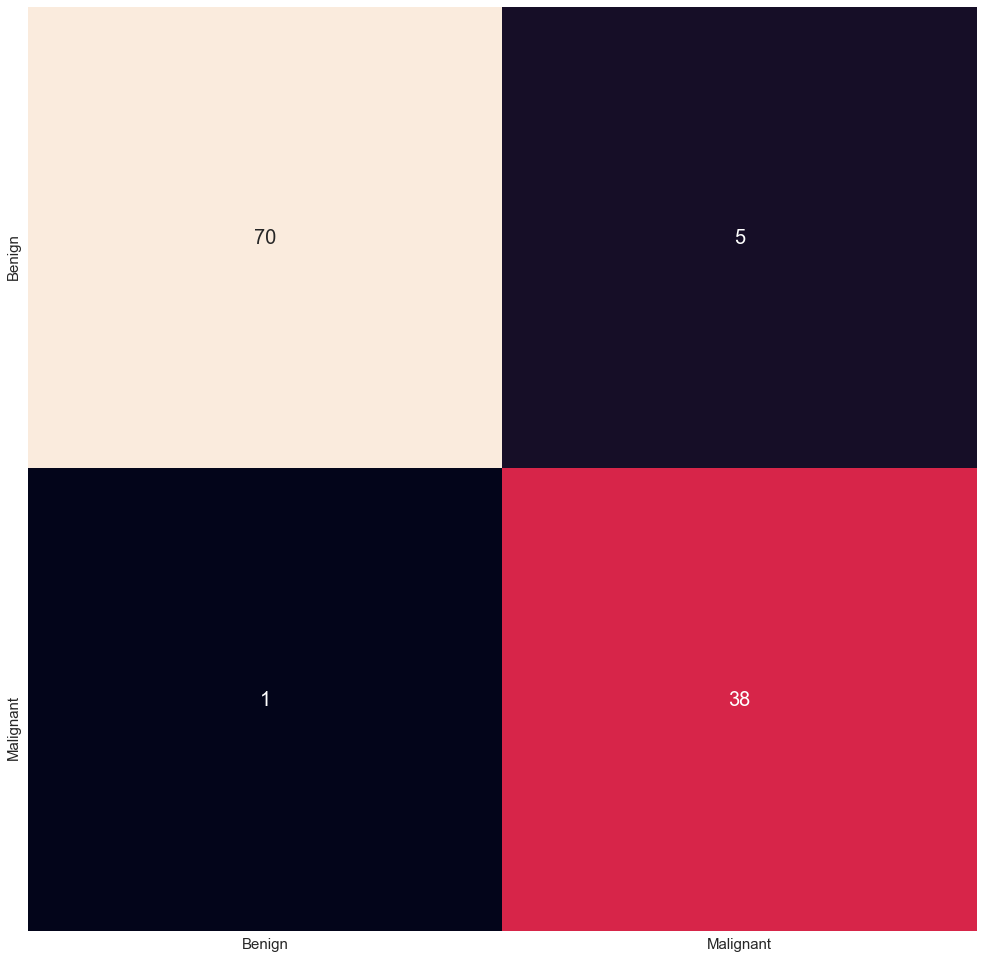

In [62]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn = knn.fit(X_train, y_train)
model_metrics(knn)

Train mean accuracy: 0.9582
Test mean accuracy: 0.9644
AUC score: 0.9477

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        75
           1       0.90      0.95      0.92        39

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



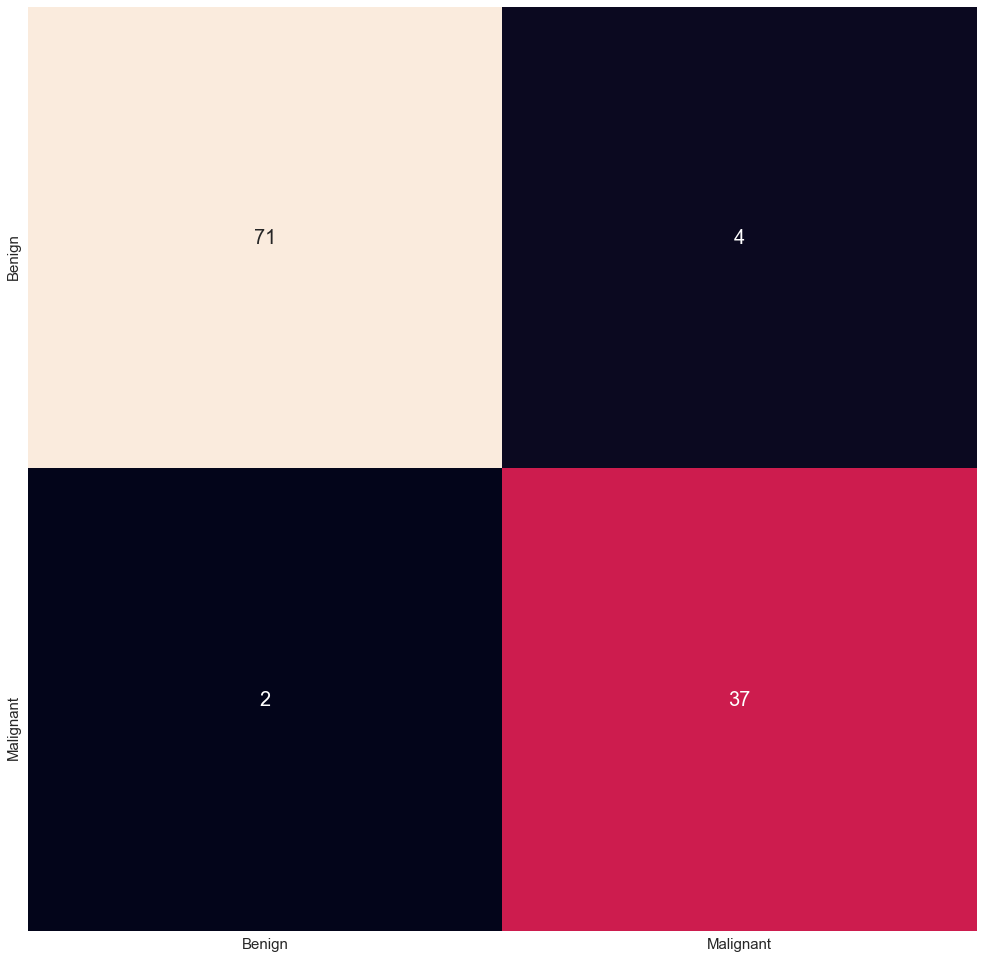

In [63]:
# SVM model
clf_svm = SVC(kernel = 'linear')
clf_svm = clf_svm.fit(X_train, y_train)
model_metrics(clf_svm)